In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('db.sql')

In [3]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
tables = pd.read_sql(query, conn)

print(tables)

       name
0    markas
1  stacijas
2     cenas


In [4]:
query = "SELECT * FROM markas"

marka = pd.read_sql(query, conn, index_col='id')

marka

,marka
id,
1,E95
2,E98
3,Diesel
4,Gas


In [5]:
query = "SELECT * FROM stacijas"

stacija = pd.read_sql(query, conn, index_col='id')

stacija

,stacija,adrese,region
id,,,
1,Trest,Dārzciema iela 127,1
2,Trest,Satekles iela 2,1
3,Trest,Brīvības gatve 250,1
4,Trest,Mārupes iela 57,1
5,Trest,Mīlgrāvja iela 18,1
...,...,...,...
132,Neste Oil,Augusta Deglava iela 51a,1
133,Neste Oil,Dzirnavu iela 127,1
134,SOS,Kojusalas iela 15,1


In [6]:
query = "SELECT * FROM cenas"

cenas = pd.read_sql(query, conn, index_col='id')

cenas

,date,marka,cena,stacija,isLast
id,,,,,
1,2012-01-20 09:40:00,1,0.924,1,0
2,2012-01-20 09:40:00,2,0.981,1,0
3,2012-01-20 09:40:00,3,0.924,1,0
4,2012-01-20 09:40:00,4,0.000,1,0
5,2012-01-20 09:34:00,1,0.938,2,0
...,...,...,...,...,...
7378,2012-09-18 21:01:00,4,0.459,74,1
7379,2012-09-18 21:01:00,4,0.459,75,1
7380,2012-09-18 21:01:00,4,0.459,76,1


In [7]:
cenas_marka = pd.merge(cenas, marka, left_on="marka", right_on="id")
cenas_marka

,date,marka_x,cena,stacija,isLast,marka_y
0,2012-01-20 09:40:00,1,0.924,1,0,E95
1,2012-01-20 09:34:00,1,0.938,2,0,E95
2,2012-01-20 09:34:00,1,0.938,3,0,E95
3,2012-01-20 09:40:00,1,0.938,4,0,E95
4,2012-01-20 09:38:00,1,0.939,5,0,E95
...,...,...,...,...,...,...
7348,2012-09-18 21:01:00,4,0.459,73,1,Gas
7349,2012-09-18 21:01:00,4,0.459,74,1,Gas
7350,2012-09-18 21:01:00,4,0.459,75,1,Gas
7351,2012-09-18 21:01:00,4,0.459,76,1,Gas


In [8]:
cenas_marka_stacija = pd.merge(cenas_marka, stacija, left_on="stacija", right_on="id")
cenas_marka_stacija

,date,marka_x,cena,stacija_x,isLast,marka_y,stacija_y,adrese,region
0,2012-01-20 09:40:00,1,0.924,1,0,E95,Trest,Dārzciema iela 127,1
1,2012-01-23 09:39:00,1,0.929,1,0,E95,Trest,Dārzciema iela 127,1
2,2012-02-15 09:42:00,1,0.940,1,0,E95,Trest,Dārzciema iela 127,1
3,2012-02-22 09:38:00,1,0.950,1,0,E95,Trest,Dārzciema iela 127,1
4,2012-03-16 09:22:00,1,0.960,1,0,E95,Trest,Dārzciema iela 127,1
...,...,...,...,...,...,...,...,...,...
7348,2012-09-17 21:00:00,4,0.454,135,0,Gas,Statoil,Gunāra Astras iela 17,1
7349,2012-09-18 21:01:00,4,0.459,135,1,Gas,Statoil,Gunāra Astras iela 17,1
7350,2012-08-07 14:01:00,1,0.000,136,1,E95,Statoil,Gunāra Astras iela 10,1
7351,2012-08-07 14:01:00,2,0.992,136,1,E98,Statoil,Gunāra Astras iela 10,1


<ipython-input-17-0dd141b7687a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["date"]=pd.to_datetime(res["date"])


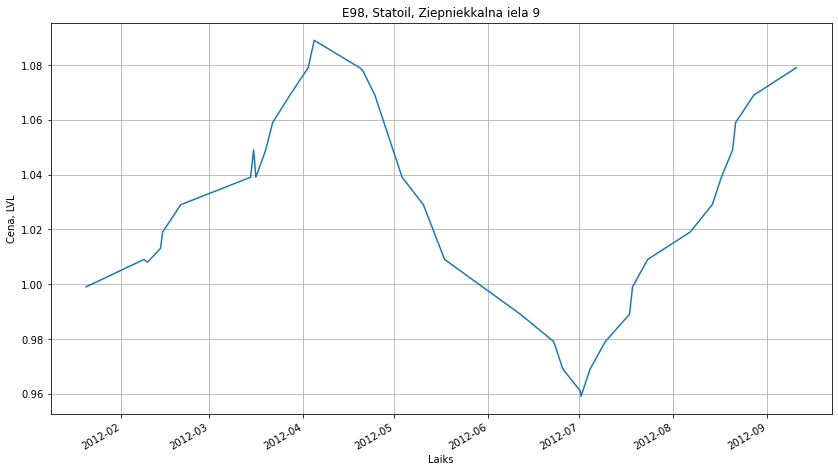

In [17]:
res = cenas_marka_stacija[(cenas_marka_stacija['stacija_x'] == 80) & (cenas_marka_stacija['marka_x'] == 2)]
res["date"]=pd.to_datetime(res["date"])
res.set_index('date', inplace=True)
ax=res["cena"].plot(figsize=(14,8))

ax.set_xlabel('Laiks')
ax.set_ylabel('Cena, LVL')
ax.set_title('E98, Statoil, Ziepniekkalna iela 9')
ax.grid()



In [11]:
res

,marka_x,cena,stacija_x,isLast,marka_y,stacija_y,adrese,region
date,,,,,,,,
2012-01-20 08:00:00,2,0.999,80,0,E98,Statoil,Ziepniekkalna iela 9,1
2012-02-08 10:40:00,2,1.009,80,0,E98,Statoil,Ziepniekkalna iela 9,1
2012-02-09 14:01:00,2,1.008,80,0,E98,Statoil,Ziepniekkalna iela 9,1
2012-02-13 21:01:00,2,1.013,80,0,E98,Statoil,Ziepniekkalna iela 9,1
2012-02-14 14:00:00,2,1.019,80,0,E98,Statoil,Ziepniekkalna iela 9,1
2012-02-20 14:00:00,2,1.029,80,0,E98,Statoil,Ziepniekkalna iela 9,1
2012-03-14 14:01:00,2,1.039,80,0,E98,Statoil,Ziepniekkalna iela 9,1
2012-03-15 14:00:00,2,1.049,80,0,E98,Statoil,Ziepniekkalna iela 9,1
2012-03-16 08:01:00,2,1.039,80,0,E98,Statoil,Ziepniekkalna iela 9,1
